In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from iminuit import Minuit

import emcee
from pprint import pprint
import time
from multiprocessing import Pool

import random

## 2002 模型检验

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_02(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata02 = pd.read_csv("perlist02_h.csv")
    f = perdata02['f']
    per = perdata02['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata02)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [3]:
m02=Minuit(twi_minus_loglikelihood_02,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.02,error_log_poisson=0.1,
         limit_log_A=(-3,1), limit_log_f_b=(-7,-2),limit_log_poisson=(0,4),
         errordef=1)
'''
多次尝试，alpha_H仍收敛到限制区间的右边界。索性放弃对alpha_H的限制。
'''

m02.migrad()

pprint(m02.fval)

FCN = 4529.565182005583 
 TOTAL NCALL = 457 
 NCALLS = 457 
 
 
 EDM = 0.0001760334117543769 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.15644,0.201405,,,-3,1,No
1,log_f_b,-3.46266,0.171719,,,-7,-2,No
2,alpha_H,44.1108,323.223,,,,,No
3,log_poisson,2.36716,0.0238575,,,0,4,No


4529.565182005583


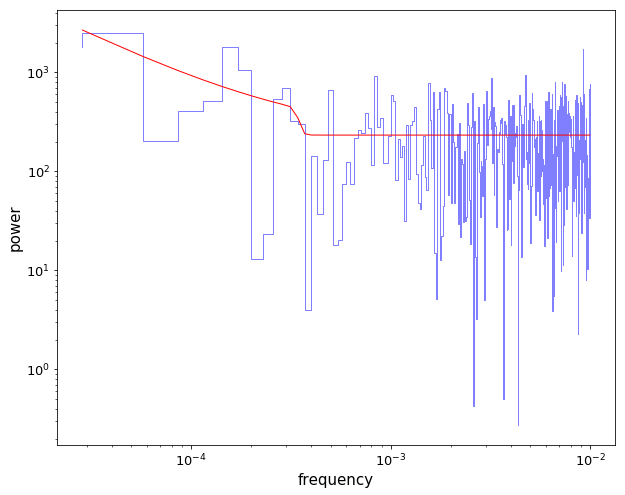

In [4]:
perdata02 = pd.read_csv("perlist02_h.csv")
f_02 = perdata02['f']
per_02 = perdata02['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m02.values[0],m02.values[1],m02.values[2],m02.values[3]

model_02 = []
f_length_02 = len(f_02)
for i in range(f_length_02):
    model_02.append(((f_02[i]**(-alpha_L))/(1+(f_02[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_02, per_02, color="b", alpha=0.5, linewidth=1)
plt.plot(f_02, model_02, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2002 模型比较

In [5]:
def twi_minus_loglikelihood_nobreak_02(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata02 = pd.read_csv("perlist02_h.csv")
    f = perdata02['f']
    per = perdata02['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata02)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [6]:
n02=Minuit(twi_minus_loglikelihood_nobreak_02,log_A=-3,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-6,-1),limit_alpha=(0,1.9),limit_log_poisson=(-1,4),
         errordef=1)
'''
此处alpha右边界稍调大，表格就会标红。
'''
n02.migrad()

print(n02.fval)

FCN = 4532.210684084765 
 TOTAL NCALL = 293 
 NCALLS = 293 
 
 
 EDM = 4.633829394414328e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-3.0638,1.54226,,,-6,-1,No
1,alpha,1.45643,0.409629,,,0,1.9,No
2,log_poisson,2.36097,0.0262988,,,-1,4,No


4532.210684084765


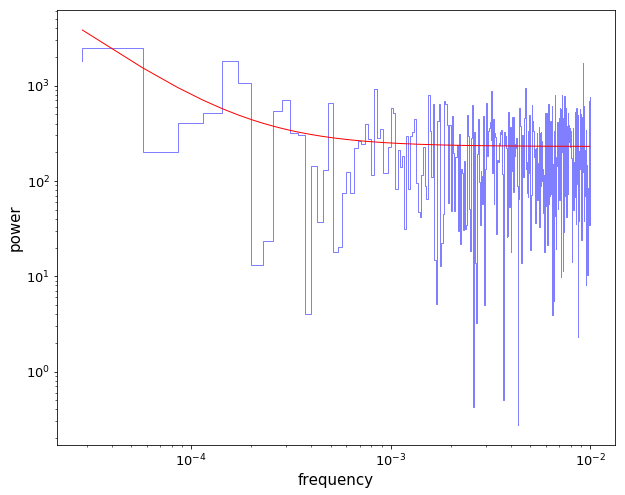

In [7]:
log_A,alpha,log_poisson = n02.values[0],n02.values[1],n02.values[2]

model_nob_02 = []
f_length_02 = len(f_02)
for i in range(f_length_02):
    model_nob_02.append((f_02[i]**(-alpha))*(10**log_A)+(10**log_poisson))
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_02, per_02, color="b", alpha=0.5, linewidth=1)
plt.plot(f_02, model_nob_02, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

2.6455020791818242


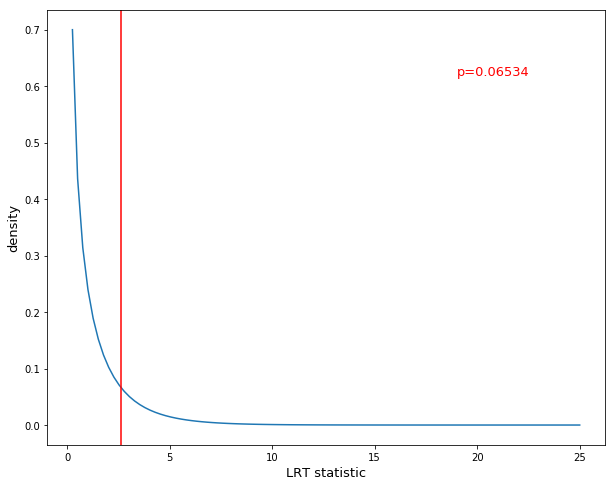

In [8]:
import scipy.stats as stats

# LRT statistic
T = n02.fval-m02.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2011(4) 模型检验

In [9]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_114(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata114 = pd.read_csv("perlist114_h.csv")
    f = perdata114['f']
    per = perdata114['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata114)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [10]:
m114=Minuit(twi_minus_loglikelihood_114,log_A=3.1,log_f_b=-12,alpha_H=1.4,log_poisson=2.1,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.02,error_log_poisson=0.1,
        
         errordef=1)

'''
限制区间总是标红？
'''
m114.migrad()

pprint(m114.fval)

FCN = 13174.07874297636 
 TOTAL NCALL = 132 
 NCALLS = 132 
 
 
 EDM = 9.571424692732284e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 False 
 True 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,2.79577,1.26068,,,,,No
1,log_f_b,-12.865,2.74306,,,,,No
2,alpha_H,1.46065,0.0809275,,,,,No
3,log_poisson,2.13387,0.0145598,,,,,No


13174.07874297636


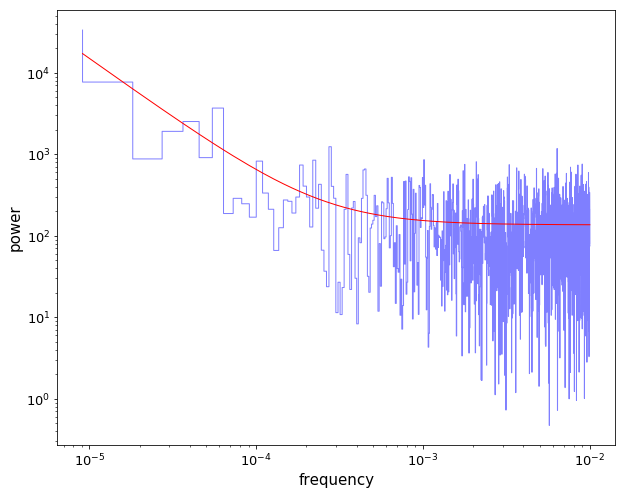

In [11]:
perdata114 = pd.read_csv("perlist114_h.csv")
f_114 = perdata114['f']
per_114 = perdata114['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m114.values[0],m114.values[1],m114.values[2],m114.values[3]

model_114 = []
f_length_114 = len(f_114)
for i in range(f_length_114):
    model_114.append(((f_114[i]**(-alpha_L))/(1+(f_114[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_114, per_114, color="b", alpha=0.5, linewidth=1)
plt.plot(f_114, model_114, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2011(4) 模型比较

In [12]:
def twi_minus_loglikelihood_nobreak_114(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata114 = pd.read_csv("perlist114_h.csv")
    f = perdata114['f']
    per = perdata114['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata114)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [13]:
n114=Minuit(twi_minus_loglikelihood_nobreak_114,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-8,-1),limit_alpha=(1.0,5.0),limit_log_poisson=(0,3),
         errordef=1)

n114.migrad()

pprint(n114.fval)

FCN = 13174.07853426867 
 TOTAL NCALL = 231 
 NCALLS = 231 
 
 
 EDM = 1.9144524395199964e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-3.13564,0.699635,,,-8,-1,No
1,alpha,1.46196,0.1727,,,1,5,No
2,log_poisson,2.13397,0.015845,,,0,3,No


13174.07853426867


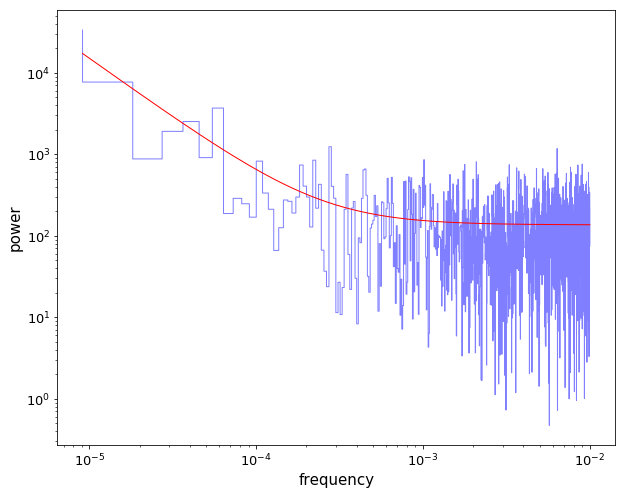

In [14]:
log_A,alpha,log_poisson = n114.values[0],n114.values[1],n114.values[2]

model_nob_114 = []
f_length_114 = len(f_114)
for i in range(f_length_114):
    model_nob_114.append((f_114[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_114, per_114, color="b", alpha=0.5, linewidth=1)
plt.plot(f_114, model_nob_114, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

-0.00020870769003522582


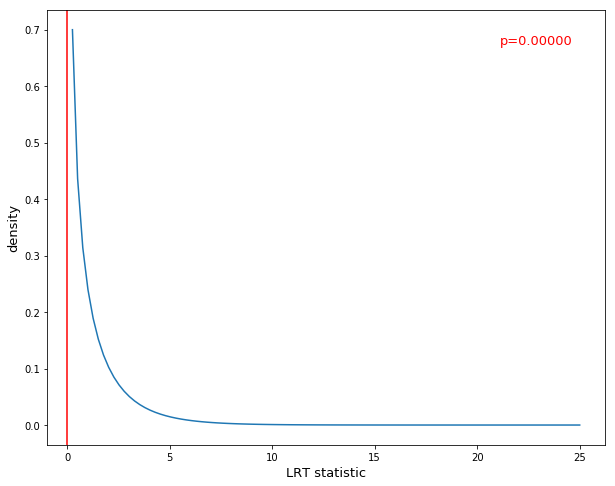

In [15]:
import scipy.stats as stats

# LRT statistic
T = n114.fval-m114.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2016(2) 模型检验

In [16]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_162(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata162 = pd.read_csv("perlist162_h.csv")
    f = perdata162['f']
    per = perdata162['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata162)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [17]:
m162=Minuit(twi_minus_loglikelihood_162,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.02,error_log_poisson=0.1,
         limit_log_A=(-3,1), limit_log_f_b=(-7,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(0,4),
         errordef=1)

m162.migrad()

pprint(m162.fval)

FCN = 14050.53524349469 
 TOTAL NCALL = 395 
 NCALLS = 395 
 
 
 EDM = 2.5495986074404997e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.10099,0.129342,,,-3,1,No
1,log_f_b,-3.39068,0.175793,,,-7,-2,No
2,alpha_H,3.22635,2.84108,,,1,5,No
3,log_poisson,2.07549,0.0154475,,,0,4,No


14050.53524349469


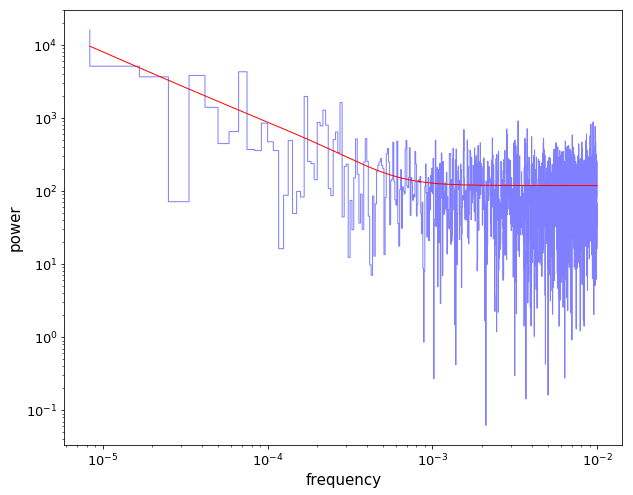

In [18]:
perdata162 = pd.read_csv("perlist162_h.csv")
f_162 = perdata162['f']
per_162 = perdata162['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m162.values[0],m162.values[1],m162.values[2],m162.values[3]

model_162 = []
f_length_162 = len(f_162)
for i in range(f_length_162):
    model_162.append(((f_162[i]**(-alpha_L))/(1+(f_162[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_162, per_162, color="b", alpha=0.5, linewidth=1)
plt.plot(f_162, model_162, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2016(2) 模型比较

In [19]:
def twi_minus_loglikelihood_nobreak_162(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata162 = pd.read_csv("perlist162_h.csv")
    f = perdata162['f']
    per = perdata162['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata162)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [20]:
n162=Minuit(twi_minus_loglikelihood_nobreak_162,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-8,-1),limit_alpha=(1.0,5.0),limit_log_poisson=(0,4),
         errordef=1)

n162.migrad()

pprint(n162.fval)

FCN = 14052.53154647725 
 TOTAL NCALL = 171 
 NCALLS = 171 
 
 
 EDM = 3.4706453389236077e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-2.6136,0.765644,,,-8,-1,No
1,alpha,1.35677,0.204055,,,1,5,No
2,log_poisson,2.05861,0.0180355,,,0,4,No


14052.53154647725


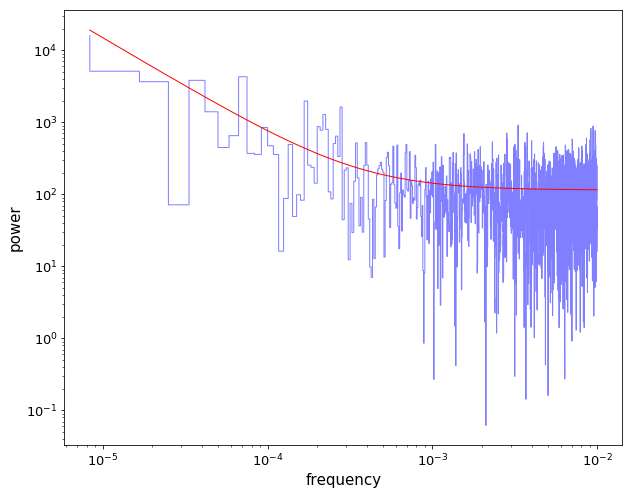

In [21]:
log_A,alpha,log_poisson = n162.values[0],n162.values[1],n162.values[2]

model_nob_162 = []
f_length_162 = len(f_162)
for i in range(f_length_162):
    model_nob_162.append((f_162[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_162, per_162, color="b", alpha=0.5, linewidth=1)
plt.plot(f_162, model_nob_162, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

1.9963029825594276


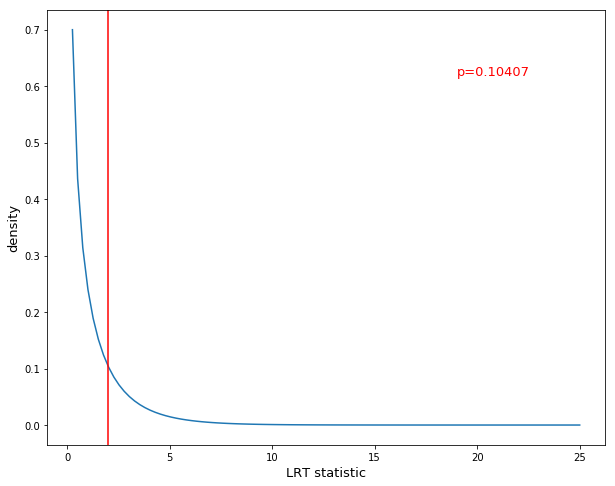

In [22]:
import scipy.stats as stats

# LRT statistic
T = n162.fval-m162.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 综合结果

In [23]:
data02 = pd.read_csv("energy_iras13224_02.csv")  
x02 = data02['x']
y02 = data02['y']
xerr02 = data02['xerr']
yerr02 = data02['yerr']

data114 = pd.read_csv("energy_iras13224_114.csv")  
x114 = data114['x']
y114 = data114['y']
xerr114 = data114['xerr']
yerr114 = data114['yerr']

data162 = pd.read_csv("energy_iras13224_162.csv")  
x162 = data162['x']
y162 = data162['y']
xerr162 = data162['xerr']
yerr162 = data162['yerr']

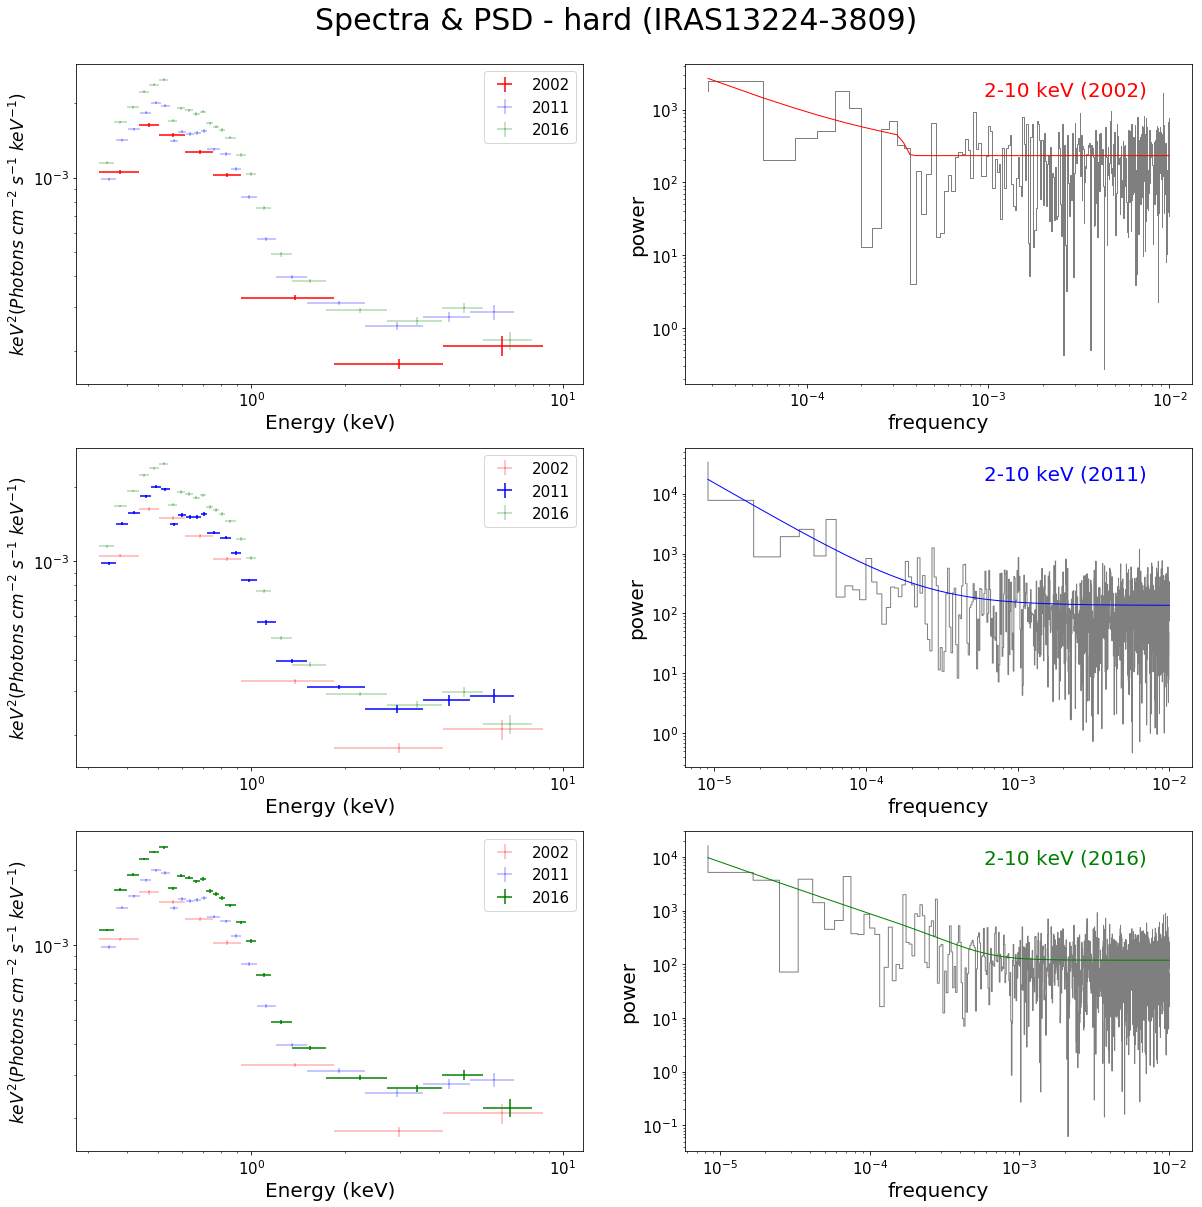

In [24]:
fig= plt.figure(figsize=(20,20))
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)



ax1.loglog()
ax1.errorbar(x02, y02, yerr=yerr02, xerr=xerr02, fmt=',r', label='2002')
ax1.errorbar(x114, y114, yerr=yerr114, xerr=xerr114, fmt=',b', alpha=0.3, label='2011')
ax1.errorbar(x162, y162, yerr=yerr162, xerr=xerr162, fmt=',g', alpha=0.3, label='2016')
ax1.set_xlabel("Energy (keV)",fontsize=20)
ax1.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=15)

ax3.loglog()
ax3.errorbar(x02, y02, yerr=yerr02, xerr=xerr02, fmt=',r', alpha=0.3, label='2002')
ax3.errorbar(x114, y114, yerr=yerr114, xerr=xerr114, fmt=',b', label='2011')
ax3.errorbar(x162, y162, yerr=yerr162, xerr=xerr162, fmt=',g', alpha=0.3, label='2016')
ax3.set_xlabel("Energy (keV)",fontsize=20)
ax3.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax3.legend(fontsize=15)
ax3.tick_params(labelsize=15)

ax5.loglog()
ax5.errorbar(x02, y02, yerr=yerr02, xerr=xerr02, fmt=',r', alpha=0.3, label='2002')
ax5.errorbar(x114, y114, yerr=yerr114, xerr=xerr114, fmt=',b', alpha=0.3, label='2011')
ax5.errorbar(x162, y162, yerr=yerr162, xerr=xerr162, fmt=',g', label='2016')
ax5.set_xlabel("Energy (keV)",fontsize=20)
ax5.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax5.legend(fontsize=15)
ax5.tick_params(labelsize=15)


ax2.loglog()
ax2.step(f_02, per_02, color="k", alpha=0.5, linewidth=1)
ax2.plot(f_02, model_02, color="r", linewidth=1)
ax2.set_xlabel("frequency",fontsize=20)
ax2.set_ylabel("power",fontsize=20)
ax2.text(0.75,0.9,"2-10 keV (2002)",color='r',ha='center',transform=ax2.transAxes,fontsize=20)
ax2.tick_params(labelsize=15)

ax4.loglog()
ax4.step(f_114, per_114, color="k", alpha=0.5, linewidth=1)
ax4.plot(f_114, model_114, color="b", linewidth=1)
ax4.set_xlabel("frequency",fontsize=20)
ax4.set_ylabel("power",fontsize=20)
ax4.text(0.75,-0.3,"2-10 keV (2011)",color='b',ha='center',transform=ax2.transAxes,fontsize=20)
ax4.tick_params(labelsize=15)

ax6.loglog()
ax6.step(f_162, per_162, color="k", alpha=0.5, linewidth=1)
ax6.plot(f_162, model_162, color="g", linewidth=1)
ax6.set_xlabel("frequency",fontsize=20)
ax6.set_ylabel("power",fontsize=20)
ax6.text(0.75,-1.5,"2-10 keV (2016)",color='g',ha='center',transform=ax2.transAxes,fontsize=20)
ax6.tick_params(labelsize=15)

plt.suptitle("Spectra & PSD - hard (IRAS13224-3809)", x=0.5, y=0.92, fontsize=30)
plt.show()